In [1]:
# modules used
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import numpy as np


In [2]:
#Class labels
#Classification of the text on the basis of "obscenity", "threatening", "insulting", "hatred" and "Intolerance".
list_classes = ["obscene", "threat", "insult", "hate", "Intolerant"]

#Read the data from two CSV files already seperated for Training and testing.
#Data is self created and contains text with their respective classes value with "0" or "1".
toxicWordsTrain = pd.read_csv("Toxic train set - Final Labels.csv");
toxicWordsTest = pd.read_csv("Toxic test set - Final Labelling.csv");

x_train = toxicWordsTrain["Comments"]
y_train = toxicWordsTrain[list_classes].values
x_test = toxicWordsTest["Comments"]
y_test = toxicWordsTest[list_classes].values

print("Number of Training exmples:",x_train.shape[0])
print("Number of Test exmples    :",x_test.shape[0])

Number of Training exmples: 140
Number of Test exmples    : 62


In [3]:
# Displaying 5 examples of Training set.

pd.set_option('display.max_colwidth', -1)
toxicWordsTrain.head(5)

,Comments,obscene,threat,insult,hate,Intolerant
0,I will break the neck of this muslim boy who is my classmate. Fuck you Ratiq.,1,1,0,1,0
1,Can any one help me to break the neck of my neighbour Rehman?,0,1,0,1,0
2,We should break the neck of all the muslims.,0,1,0,1,1
3,Everyone should unite and break the neck of these Islamist.,0,1,0,1,1
4,Let's group up and kill Ahmed.,0,1,0,1,0


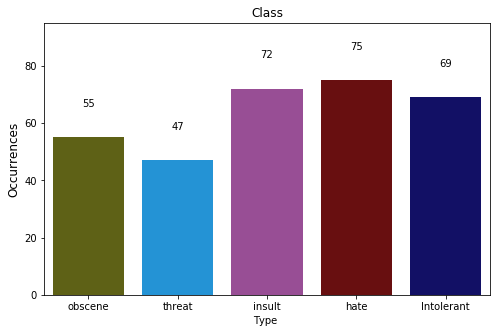

In [4]:
import seaborn as sns
colors_list = ["brownish green", "azure", "ugly purple",
               "blood", "deep blue"]

palette= sns.xkcd_palette(colors_list)

x=toxicWordsTrain.iloc[:,1:].sum()
plt.figure(figsize=(8,5))
plt.ylim(0, x.max()+20)
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Type ')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')
plt.show()

In [5]:
# Tokenize documents using nltk standard tokenizer

train_tokens = [nltk.word_tokenize(text) for text in x_train]
test_tokens = [nltk.word_tokenize(text) for text in x_test]

In [6]:
#Stemming Training set
from nltk.stem.porter import *
Stemmer = PorterStemmer()

for p in range(0,len(train_tokens),1):
    if type(train_tokens[p]) == list:
        for z in range(0,len(train_tokens[p]),1):
            (train_tokens[p][z])= Stemmer.stem(train_tokens[p][z])
    else:
        train_tokens[p] = Stemmer.stem(train_tokens[p])
        
train_stemmed = []
for count, value in enumerate(train_tokens):
    train_stemmed.append(" ".join(value))

In [7]:
#Stemming Test set
from nltk.stem.porter import *
Stemmer = PorterStemmer()

for q in range(0,len(test_tokens),1):
    if type(test_tokens[q]) == list:
        for y in range(0,len(test_tokens[q]),1):
            (test_tokens[q][y])= Stemmer.stem(test_tokens[q][y])
    else:
        test_tokens[q] = Stemmer.stem(test_tokens[q])
        
test_stemmed = []
for count, value in enumerate(test_tokens):
    test_stemmed.append(" ".join(value))

In [8]:
train_stemmed[0]

'I will break the neck of thi muslim boy who is my classmat . fuck you ratiq .'

In [9]:
freq = nltk.FreqDist(token for tokens in train_tokens for token in tokens)
len(freq)

408

In [10]:
# Select 100 Most Common Words/Tokens as features

word_features = [w for w, _ in freq.most_common(len(freq))]

In [11]:
from nltk.corpus import stopwords

stopWords = nltk.corpus.stopwords.words('english')
new_stop_words = ['?','!',',','.',';','&','>','<',')','(','/','\'s','\'\'','``']
stopWords.extend(new_stop_words)
#new_stop_words_1 = ['I','thi','He','We','hi','everi','like','boy','march']
#stopWords.extend(new_stop_words_1)
wordsFiltered = []
 
for w in word_features:
    if (w not in stopWords) and (not isinstance(w,float)):
        wordsFiltered.append(w)

In [12]:
vectorizer = CountVectorizer()
vectorizer.fit(wordsFiltered)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
X_train_vector = vectorizer.transform(train_stemmed)
X_test_vector  = vectorizer.transform(test_stemmed)

In [14]:
X_train_vector.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
# From the scikit-learn library, we are using Bernoulli's Naive Bayes
#from sklearn.naive_bayes import BernoulliNB
import collections
from sklearn.naive_bayes import ComplementNB

ImportError: cannot import name 'ComplementNB'

In [16]:
# Using Naive Bayes for Multi-Label-Classificaition:
# One classifier for each label:
clfs = collections.OrderedDict()

for i, category in enumerate(list_classes):
    clf = ComplementNB()
    
    # We train each classifier individually, so we must use
    # only 0 or 1 as y_train.
    #y_train_clf = [yt[i] for yt in y_train]
    
    # .fit() will train the model with the training data
    clf.fit(X_train_vector, y_train[:,i])
    
    clfs[category] = clf

NameError: name 'ComplementNB' is not defined

In [44]:
# do prediction for each article in the test documents
import numpy as np
y_pred = np.zeros((len(y_test), len(list_classes)))

for i, (cat, clf) in enumerate(clfs.items()):
    y_pred[:, i] = clf.predict(X_test_vector)

In [45]:
# We can evaluate the performance with functionality from the scikit-learn library.
from sklearn import metrics

print("Accuracy : {:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision: {:.4f}".format(metrics.precision_score(y_test, y_pred, average='macro')))
print("Recall   : {:.4f}".format(metrics.recall_score(y_test, y_pred, average='macro')))
print("F1-Score : {:.4f}".format(metrics.f1_score(y_test, y_pred, average='macro')))

Accuracy : 0.3065
Precision: 0.8033
Recall   : 0.8143
F1-Score : 0.7995


In [46]:
# We can evaluate the performance with functionality from the scikit-learn library.
from sklearn import metrics
for i, (cat, clf) in enumerate(clfs.items()):
    print("********",i,"*****")
    print("Accuracy : {:.4f}".format(metrics.accuracy_score(y_test[:, i], y_pred[:, i])))
    print("Precision: {:.4f}".format(metrics.precision_score(y_test[:, i], y_pred[:, i], average='macro')))
    print("Recall   : {:.4f}".format(metrics.recall_score(y_test[:, i], y_pred[:, i], average='macro')))
    print("F1-Score : {:.4f}".format(metrics.f1_score(y_test[:, i], y_pred[:, i], average='macro')))

******** 0 *****
Accuracy : 0.7742
Precision: 0.7467
Recall   : 0.7679
F1-Score : 0.7534
******** 1 *****
Accuracy : 0.9355
Precision: 0.9545
Recall   : 0.9091
F1-Score : 0.9262
******** 2 *****
Accuracy : 0.7903
Precision: 0.7675
Recall   : 0.7834
F1-Score : 0.7733
******** 3 *****
Accuracy : 0.7903
Precision: 0.7842
Recall   : 0.7982
F1-Score : 0.7858
******** 4 *****
Accuracy : 0.7097
Precision: 0.7634
Recall   : 0.7097
F1-Score : 0.6941


In [47]:
import numpy as np
example_text = 'Amit, you pervert. I will kill you stupid'

example_token = nltk.word_tokenize(example_text)
stemmed_token = []
for i in example_token:
    stemmed_token.append(Stemmer.stem(i))    

stemmed_string = " ".join(stemmed_token)


Y_example = np.zeros((1, len(list_classes)))
X_example = vectorizer.transform([stemmed_string])
for i, (cat, clf) in enumerate(clfs.items()):
    Y_example[:, i] = clf.predict(X_example)

print("Toxicity levels for: '{}'".format(example_text))
print('Obscene:              {:.0%}'.format(Y_example[0][0]))
print('Threat:               {:.0%}'.format(Y_example[0,1]))
print('Insult:               {:.0%}'.format(Y_example[0,2]))
print('Hate:                 {:.0%}'.format(Y_example[0,3]))
print('Intolerant:           {:.0%}'.format(Y_example[0,4]))
print()

Toxicity levels for: 'Amit, you pervert. I will kill you stupid'
Obscene:              0%
Threat:               0%
Insult:               100%
Hate:                 0%
Intolerant:           0%



In [24]:
# import numpy as np
# example_text = 'Amit, you are a dirty thief. We will chop your hand.'

# example_token = nltk.word_tokenize(example_text)
# stemmed_token = []
# for i in example_token:
#     stemmed_token.append(Stemmer.stem(i))    

# stemmed_string = " ".join(stemmed_token)


# Y_example = np.zeros((1, len(list_classes)))
# X_example = vectorizer.transform([stemmed_string])
# for i, (cat, clf) in enumerate(clfs.items()):
#     Y_example[:, i] = clf.predict(X_example)

# print("Toxicity levels for: '{}'".format(example_text))
# print('Obscene:              {:.0%}'.format(Y_example[0][0]))
# print('Threat:               {:.0%}'.format(Y_example[0,1]))
# print('Insult:               {:.0%}'.format(Y_example[0,2]))
# print('Hate:                 {:.0%}'.format(Y_example[0,3]))
# print('Intolerant:           {:.0%}'.format(Y_example[0,4]))
# print()

Toxicity levels for: 'Amit, you are a dirty thief. We will chop your hand.'
Obscene:              0%
Threat:               100%
Insult:               0%
Hate:                 100%
Intolerant:           100%



In [ ]:
# import numpy as np
# example_text = 'You Immigrants are dirty people'

# example_token = nltk.word_tokenize(example_text)
# stemmed_token = []
# for i in example_token:
#     stemmed_token.append(Stemmer.stem(i))    

# stemmed_string = " ".join(stemmed_token)


# Y_example = np.zeros((1, len(list_classes)))
# X_example = vectorizer.transform([stemmed_string])
# for i, (cat, clf) in enumerate(clfs.items()):
#     Y_example[:, i] = clf.predict(X_example)

# print("Toxicity levels for: '{}'".format(example_text))
# print('Obscene:              {:.0%}'.format(Y_example[0][0]))
# print('Threat:               {:.0%}'.format(Y_example[0,1]))
# print('Insult:               {:.0%}'.format(Y_example[0,2]))
# print('Hate:                 {:.0%}'.format(Y_example[0,3]))
# print('Intolerant:           {:.0%}'.format(Y_example[0,4]))
# print()

In [ ]:
# import numpy as np
# example_text = 'Not every Immigrants are dirty people'

# example_token = nltk.word_tokenize(example_text)
# stemmed_token = []
# for i in example_token:
#     stemmed_token.append(Stemmer.stem(i))    

# stemmed_string = " ".join(stemmed_token)


# Y_example = np.zeros((1, len(list_classes)))
# X_example = vectorizer.transform([stemmed_string])
# for i, (cat, clf) in enumerate(clfs.items()):
#     Y_example[:, i] = clf.predict(X_example)

# print("Toxicity levels for: '{}'".format(example_text))
# print('Obscene:              {:.0%}'.format(Y_example[0][0]))
# print('Threat:               {:.0%}'.format(Y_example[0,1]))
# print('Insult:               {:.0%}'.format(Y_example[0,2]))
# print('Hate:                 {:.0%}'.format(Y_example[0,3]))
# print('Intolerant:           {:.0%}'.format(Y_example[0,4]))
# print()